In [20]:
import os
import pandas as pd
import numpy as np

# read the files in the folder preprocessed_datasets
path = 'preprocessed_datasets'
files = os.listdir(path)
files = [file for file in files if file.endswith('.csv')]
print(files)

NO3_train = pd.read_csv('preprocessed_datasets/NO3_train.csv')
NO3_val = pd.read_csv('preprocessed_datasets/NO3_val.csv')
NO3_test = pd.read_csv('preprocessed_datasets/NO3_test.csv')

print(f"n NO3_train: {NO3_train.head()}")

['NO1_test.csv', 'NO1_train.csv', 'NO1_val.csv', 'NO2_test.csv', 'NO2_train.csv', 'NO2_val.csv', 'NO3_test.csv', 'NO3_train.csv', 'NO3_val.csv', 'NO4_test.csv', 'NO4_train.csv', 'NO4_val.csv', 'NO5_test.csv', 'NO5_train.csv', 'NO5_val.csv']
n NO3_train:                    timestamp  consumption  temperature  time_of_day  \
0  2017-05-02 00:00:00+00:00     0.227701     0.450877     0.000000   
1  2017-05-02 01:00:00+00:00     0.222187     0.450877     0.043478   
2  2017-05-02 02:00:00+00:00     0.226947     0.443860     0.086957   
3  2017-05-02 03:00:00+00:00     0.236823     0.431579     0.130435   
4  2017-05-02 04:00:00+00:00     0.287226     0.426316     0.173913   

   time_of_week  time_of_year  lag_24_hours  lag_1_hour  
0      0.166667      0.331507      0.246874    0.236276  
1      0.166667      0.331507      0.248087    0.227701  
2      0.166667      0.331507      0.248142    0.222187  
3      0.166667      0.331507      0.250252    0.226947  
4      0.166667      0.331507

In [21]:
NO3_train = NO3_train.drop('timestamp', axis=1)
NO3_val = NO3_val.drop('timestamp', axis=1)
NO3_test = NO3_test.drop('timestamp', axis=1)

# Separate features and target for the training set
NO3_train_features = NO3_train.drop('consumption', axis=1).to_numpy(dtype=np.float32)
NO3_train_targets = NO3_train['consumption'].to_numpy(dtype=np.float32)

# Separate features and target for the validation set
NO3_val_features = NO3_val.drop('consumption', axis=1).to_numpy(dtype=np.float32)
NO3_val_targets = NO3_val['consumption'].to_numpy(dtype=np.float32)

# Separate features and target for the test set
NO3_test_features = NO3_test.drop('consumption', axis=1).to_numpy(dtype=np.float32)
NO3_test_targets = NO3_test['consumption'].to_numpy(dtype=np.float32)

print(f"n NO3_train: {NO3_train.head()}")
print(f"NO3_train.shape: {NO3_train.shape}")

n NO3_train:    consumption  temperature  time_of_day  time_of_week  time_of_year  \
0     0.227701     0.450877     0.000000      0.166667      0.331507   
1     0.222187     0.450877     0.043478      0.166667      0.331507   
2     0.226947     0.443860     0.086957      0.166667      0.331507   
3     0.236823     0.431579     0.130435      0.166667      0.331507   
4     0.287226     0.426316     0.173913      0.166667      0.331507   

   lag_24_hours  lag_1_hour  
0      0.246874    0.236276  
1      0.248087    0.227701  
2      0.248142    0.222187  
3      0.250252    0.226947  
4      0.268047    0.236823  
NO3_train.shape: (40920, 7)


## Feed-forward neural network

In [22]:
# Create a nn with TENSORFLOW to train on the train set, validate on the validation set and test on the test set
import tensorflow as tf
from tensorflow import keras
from keras import layers
# from tensorflow.keras import layers

print(tf.__version__)

# Create the neural network
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=[6]),
    layers.Dense(10, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Train the model
model.fit(NO3_train_features, NO3_train_targets, epochs=500, validation_data=(NO3_val_features, NO3_val_targets))

# Validate the model
val_loss = model.evaluate(NO3_val_features, NO3_val_targets)
print(f"Validation loss: {val_loss}")

# Test the model
test_loss = model.evaluate(NO3_test_features, NO3_test_targets)
print(f"Test loss: {test_loss}")

# save the model
model.save('my_model.keras')
print("Model saved")

2.16.0-rc0
Epoch 1/500
   1/1279 ━━━━━━━━━━━━━━━━━━━━ 2:27 116ms/step - loss: 0.3074

c:\Users\maxgu\Projects\.venv\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step - loss: 0.0509 - val_loss: 0.0191
Epoch 2/500
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - loss: 0.0159 - val_loss: 0.0028
Epoch 3/500
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - loss: 0.0023 - val_loss: 0.0018
Epoch 4/500
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 5/500
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 6/500
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 7/500
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/500
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/500
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/500
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 410us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 11/500
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 439us/step - loss: 0.0010 - val_loss: 9.9339e-04
Epoch

In [23]:
# Print the first 5 rows of NO3_test_features and NO3_test_targets

print("NO3_test_features:")
print(NO3_test_features[:5])

print("NO3_test_targets:")
print(NO3_test_targets[:5])

NO3_test.head()




NO3_test_features:
[[0.26491228 0.         0.         0.00273973 0.53241885 0.6154053 ]
 [0.23859648 0.04347826 0.         0.00273973 0.51876056 0.59560496]
 [0.2263158  0.08695652 0.         0.00273973 0.5098837  0.58923537]
 [0.2263158  0.13043478 0.         0.00273973 0.50248224 0.58530515]
 [0.22807017 0.17391305 0.         0.00273973 0.5002929  0.59190637]]
NO3_test_targets:
[0.59560496 0.58923537 0.58530515 0.59190637 0.6127612 ]


,consumption,temperature,time_of_day,time_of_week,time_of_year,lag_24_hours,lag_1_hour
0,0.595605,0.264912,0.000000,0.0,0.00274,0.532419,0.615405
1,0.589235,0.238596,0.043478,0.0,0.00274,0.518761,0.595605
2,0.585305,0.226316,0.086957,0.0,0.00274,0.509884,0.589235
3,0.591906,0.226316,0.130435,0.0,0.00274,0.502482,0.585305
4,0.612761,0.228070,0.173913,0.0,0.00274,0.500293,0.591906


(8736, 6)


C:\Users\maxgu\AppData\Local\Temp\ipykernel_7536\1620957984.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  test_x_copy[i+1, -1] = prediction


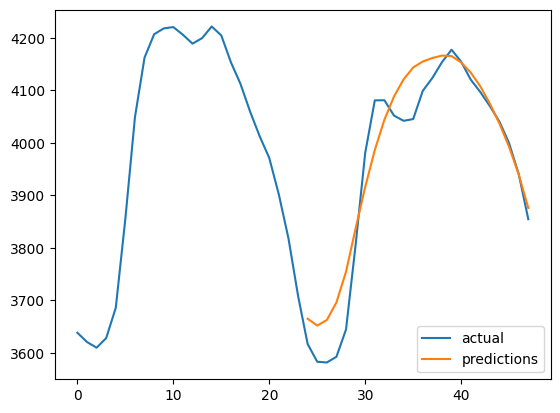

In [50]:
import matplotlib.pyplot as plt
import joblib

# Load the scaler
NO3scaler = joblib.load('preprocessed_datasets/NO3scaler.pkl')

# import scaling library
from sklearn.preprocessing import MinMaxScaler




# I want a function that takes a model, test_x, test_y and 2 ints, start and end
# The function should create a copy of test_x from the indexes start to end,
# then delete the following values:
# The last column in test_x is the feature lag_1_hour, all rows except the first one should be deleted
# The second last column in test_x is the feature lag_24_hours, all rows except the first 24 should be deleted

# The function should then use the model to predict the consumption for the copy of test_x
# The predictions should be done one at a time and the result should be stored in a list: predictions
# Also, the current prediction should be stored in the next row of the last column of test_x
# and 24 rows after the current row in the second last column of test_x
# such that future prediction can use the new values of lag_1_hour and lag_24_hours

# The dataset is a numpy.ndarray so the columns need to be accessed by index 
# The function should plot a graph with the actual consumption and the predictions

def predict_and_update(model, test_x, test_y, start=24, end=48, scaler=NO3scaler):
    test_x_copy = test_x[start-24:end].copy()
    test_y_copy = test_y[start-24:end].copy()
    test_x_copy[start + 1:, -1] = 0
    # test_x_copy[24:, -2] = 0
    predictions = []
    for i in range(24, len(test_y_copy)):
        # Make prediction without elaborating the result
        prediction = model.predict(test_x_copy[i].reshape(1, -1), verbose=0)
        predictions.append(prediction[0][0])
        if i < len(test_x_copy)-1:
            test_x_copy[i+1, -1] = prediction
        #if i < len(test_x_copy)-24:
        #    test_x_copy[i+24, -2] = prediction
    
    # Rescale the data to original values
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).reshape(-1)
    test_y_copy = scaler.inverse_transform(test_y_copy.reshape(-1, 1)).reshape(-1)

    plt.figure(figsize=(12, 6))
    plt.plot(test_y_copy, label='actual')
    plt.plot(range(24, len(test_y_copy)), predictions, label='predictions') 
    plt.legend()
    plt.show()

# test the function
print(NO3_test_features.shape)
predict_and_update(model, NO3_test_features, NO3_test_targets)